**Part I: N-gram Modeling and Perplexity**

Part I is to build N-gram language models from scratch and evaluate them.

Specifically, you will use a subset of the One Billion Word Language Modeling Benchmark.

"1bbenchmark.train.tokens" -- data for training your language models.
"1bbenchmark.test.tokens" -- data for evaluating your language models
Note that you do NOT need to do any text preprocessing.  Each line in each file contains a whitespace-tokenized sentence.  You can use the white-space separated tokens as is.  Note that tokens are mixed-cased (upper and lower) -- use them as is.

As for the tasks,

Build N-gram Models: You will build unigram, bigram, and trigram language models from the training corpus ("1bbenchmark.train.tokens").  After setting up the vocabulary (see (*) below), convert tokens that are not in the vocabulary (i.e., OOV's) to '\<unk\>', adding '\<START\>' and '\<STOP\>' in the beginning and at the end of a sentence respectively, then start creating models.
Evaluate Your Models with Perplexity: After implementing your N-gram models (using the training corpus), you should implement two versions of the perplexity function and apply them to the test corpus ("1bbenchmark.test.tokens"):
- (1) one without any smoothing technique;
- (2) one with Laplace smoothing.


To compute perplexity,
REQUIREMENTS:
Be sure to use log probability.  This is to prevent floating-point underflow, which happens when multiplying many small probabilities.  Then in the final output, convert it back to the regular probability.
Implement the equivalent formula below (the second line) to avoid infinity. 

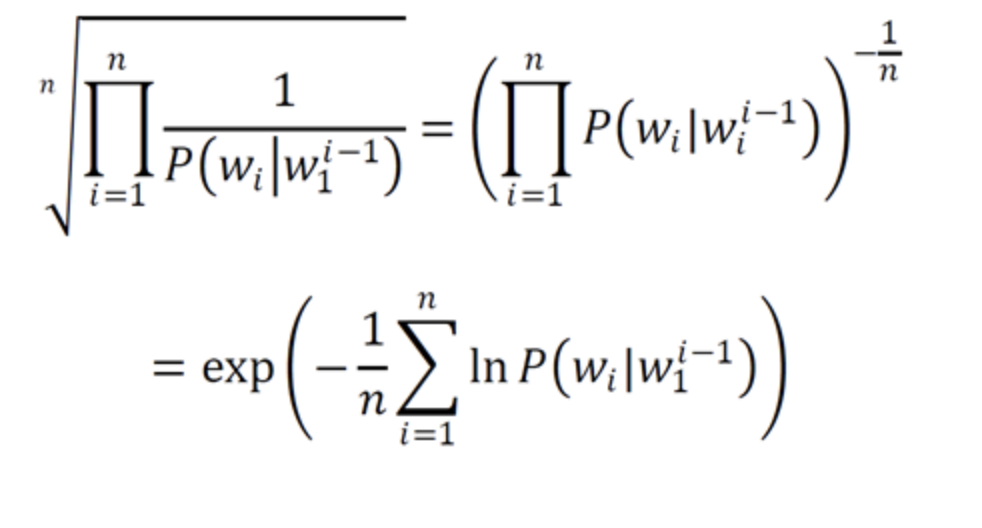


[Code Hints]

(*) You must build the vocabulary as a separate pre-step before constructing N-gram models.  First, be sure to use tokens only from the training set.  Then lump tokens that occurred (strictly) less than three times into a special symbol '\<unk\>'.  Then add a symbol '\<STOP\>' to finalize the vocabulary.  Note that you do NOT consider '\<START\>' in the vocabulary.  You vocabulary should have 26,602 types.

On how to handle \<START\> tokens, read the "Hints" document prepared by the U Washington course.

Regarding how to create N-gram models,  you can do in any way you wish.   Here is one idea that utilizes NLTK.  If you are new to NLTK, you can read the first few chapter of the book to familiarize yourself with it.

From a line in the training data, you create a list of tokens by first splitting tokens by white spaces , then converting tokens to those in the vocabulary.

Pass the list of tokens to the NLTK's library function nltk.ngrams(list_of_tokens, n) to obtain ngrams for a given n (2 for bigram and 3 for trigram) [API page]. The function returns a list of all ngrams made the list_of_tokens, for example,

- Bigrams:   [('\<START\>', 'Films'), ('Films', 'adapted'), ('adapted', 'from'), ('from', 'comic'), ..., ('.', '\<STOP\>)]
- Trigrams:  [('\<START\>', '\<START\>', 'Films'), ('\<START\>', 'Films', 'adapted'), ('Films', 'adapted', 'from'), ('adapted', 'from', 'comic'), ..., (' way', '.', '\<STOP\>)]
 
For each n (bigram/trigram), pass the list of ngrams to the nltk.ConditionalFreqDist(list_of_ngrams) function [API page]. This function receives a list of 2-tuples/pairs, and returns a nested dictionary where keys are the first element of the pairs and the values are the frequency distribution dictionary (nltk.FreqDist() dictionary) of the second element of the pairs.
 
Now finally to create Ngram language models, you should first note that they are simply Ngram probability models.  To obtain one, you do not construct anything new -- you simply access the ConditonalFreqDist (for each n (bigram/trigram) by calling freq() in NLTK:

In [61]:
import nltk
from nltk.util import ngrams
import collections
import math
from nltk import FreqDist
import random

In [2]:
def readFile(fileName):
    '''Function to read the file and return the sentences in a list'''
    
    with open(fileName, 'r') as f:
        sentences = [line.strip() for line in f.readlines()]
    return sentences


def build_vocabulary(tokens, min_frequency=3):
    '''Function to Build the vocabulary, grouping rare tokens as '<unk>'''
    vocab = []
    vocab.append('<unk>')  # Add <unk> for rare words
    vocab.append('<STOP>')  # Add <STOP> for sentence endings
    
    token_counts = collections.Counter(tokens)
    # Include tokens with frequency >= min_frequency, plus '<unk>' and '<STOP>'
    vocab.extend([token for token, count in token_counts.items() if count >= min_frequency])

    return vocab, token_counts


def preprocess_sentence(sentence, vocab):
    '''Function to process the sentence to have unk and start and stop tags'''
    tokens = sentence.split()  # Split sentence by whitespace
    tokens = [token if token in vocab else '<unk>' for token in tokens] + ['<STOP>']
    return tokens

        
def preprocess_data(sentences, vocab):
    return [preprocess_sentence(sentence, vocab) for sentence in sentences]
    
def unigram(sentences, vocab, n=1):
    '''Function to create uni-grams'''
    list_unigram = []

    for sentence in sentences:
        #print(sentence)
        # preprocess the sentences
        tokens = preprocess_sentence(sentence, vocab)
        #print(tokens)
    
        #ngrams = list(nltk.ngrams(tokens, n, pad_left=True, left_pad_symbol='<START>'))
        ngrams = list(nltk.ngrams(tokens, n))

        list_unigram.extend(ngrams)
                              
    # compute conditional freq distributions
    cfd_pos_1 = build_conditional_freqdist(list_unigram)
    
    return list_unigram, cfd_pos_1
    

def bigram(sentences, vocab, n=2):
    '''Function to create bi-grams'''
    
    list_bigram = []

    for sentence in sentences:

        tokens = preprocess_sentence(sentence, vocab)
        
        ngrams = list(nltk.ngrams(tokens, n, pad_left=True, left_pad_symbol='<START>'))
        #print(ngrams)
        list_bigram.extend(ngrams)
        
    #ngrams = list(nltk.ngrams(tokens, n))
    #print(list_bigram)
    cfd_pos_2 = build_conditional_freqdist(list_bigram,n)
    
    return list_bigram, cfd_pos_2

def trigram(sentences, vocab, n=3):
    '''Function to create tri-grams'''

    list_trigram = []

    for sentence in sentences:

        tokens = preprocess_sentence(sentence, vocab)
        
        ngrams = list(nltk.ngrams(tokens, n, pad_left=True, left_pad_symbol='<START>'))
        #ngrams = list(nltk.ngrams(tokens, n))

        list_trigram.extend(ngrams)
                  
    cfd_pos_3 = build_conditional_freqdist(list_trigram,n)
    
    return list_trigram, cfd_pos_3

def build_conditional_freqdist(ngrams, n=1):
    if n == 1:
        cfd = FreqDist(ngrams)
    else:
        # Build conditional frequency distribution for the ngrams
        tupled = [(tri[:-1], tri[-1]) for tri in ngrams]
        cfd = nltk.ConditionalFreqDist(tupled)
    return cfd

def flatten(sents):
  # assuming the nesting level of 2..
  return [token for sent in sents for token in sent]


In [3]:
# read the file to get the list of sentences
sentences = readFile('1b_benchmark.train.tokens.txt')
sentences[:3]

['Having a little flexibility on that issue would go a long way to putting together a final package .',
 'Long before the advent of e-commerce , Wal-Mart \'s founder Sam Walton set out his vision for a successful retail operation : " We let folks know we \'re interested in them and that they \'re vital to us-- \' cause they are , " he said .',
 'A spokesman said the company has been affected by the credit crunch in the United States .']

In [4]:
# generate the token from the sentences
tokens = [word for sentence in sentences for word in sentence.split()]
print(tokens[:10])

['Having', 'a', 'little', 'flexibility', 'on', 'that', 'issue', 'would', 'go', 'a']


### Build Vocabulary

In [5]:
# get the vocabulary
vocab, token_counts = build_vocabulary(tokens)

In [6]:
vocab_size = len(vocab)
print(f"Total length of vocabulary is ::: {vocab_size}")

Total length of vocabulary is ::: 26602


In [7]:
print(vocab[:10])

['<unk>', '<STOP>', 'Having', 'a', 'little', 'flexibility', 'on', 'that', 'issue', 'would']


### - Preproces the sentences for the train file
### - Flatten the tokens
### - Get list of n grams uni, bi, tri
### - Build conditional freq dist by sending the flattned ngram list

In [8]:
# preprocess each sentences of the train file
process_sentences = preprocess_data(sentences, vocab)

In [9]:
print(process_sentences[0:2])

[['Having', 'a', 'little', 'flexibility', 'on', 'that', 'issue', 'would', 'go', 'a', 'long', 'way', 'to', 'putting', 'together', 'a', 'final', 'package', '.', '<STOP>'], ['Long', 'before', 'the', 'advent', 'of', 'e-commerce', ',', 'Wal-Mart', "'s", 'founder', 'Sam', 'Walton', 'set', 'out', 'his', 'vision', 'for', 'a', 'successful', 'retail', 'operation', ':', '"', 'We', 'let', 'folks', 'know', 'we', "'re", 'interested', 'in', 'them', 'and', 'that', 'they', "'re", 'vital', 'to', '<unk>', "'", 'cause', 'they', 'are', ',', '"', 'he', 'said', '.', '<STOP>']]


In [10]:
# length of the process sentences and the sentences from the tain set
len(process_sentences) , len(sentences)

(61530, 61530)

In [11]:
# Flatten the list of processed sentences into a single list of tokens
flattened_tokens = flatten(process_sentences)

In [12]:
print(flattened_tokens[:22])

['Having', 'a', 'little', 'flexibility', 'on', 'that', 'issue', 'would', 'go', 'a', 'long', 'way', 'to', 'putting', 'together', 'a', 'final', 'package', '.', '<STOP>', 'Long', 'before']


### Build N-grams

In [13]:
list_unigram, cfd_train_pos_1 = unigram(sentences, vocab)
list_bigram, cfd_train_pos_2 = bigram(sentences, vocab)
list_trigram, cfd_train_pos_3 = trigram(sentences,vocab)

In [14]:
print(list_unigram[:10])
print(cfd_train_pos_1[('Having',)])

[('Having',), ('a',), ('little',), ('flexibility',), ('on',), ('that',), ('issue',), ('would',), ('go',), ('a',)]
47


In [15]:
print(list_bigram[:25])
print("____________")
cfd_train_pos_2[('<START>',)]

[('<START>', 'Having'), ('Having', 'a'), ('a', 'little'), ('little', 'flexibility'), ('flexibility', 'on'), ('on', 'that'), ('that', 'issue'), ('issue', 'would'), ('would', 'go'), ('go', 'a'), ('a', 'long'), ('long', 'way'), ('way', 'to'), ('to', 'putting'), ('putting', 'together'), ('together', 'a'), ('a', 'final'), ('final', 'package'), ('package', '.'), ('.', '<STOP>'), ('<START>', 'Long'), ('Long', 'before'), ('before', 'the'), ('the', 'advent'), ('advent', 'of')]
____________


FreqDist({'The': 8913, '<unk>': 4834, '"': 3990, 'But': 1939, 'He': 1802, 'It': 1750, 'In': 1744, 'A': 1421, 'I': 1040, 'And': 778, ...})

In [17]:
print(list_trigram[:25])
print("____________")
cfd_train_pos_3[('<START>','<START>')]

[('<START>', '<START>', 'Having'), ('<START>', 'Having', 'a'), ('Having', 'a', 'little'), ('a', 'little', 'flexibility'), ('little', 'flexibility', 'on'), ('flexibility', 'on', 'that'), ('on', 'that', 'issue'), ('that', 'issue', 'would'), ('issue', 'would', 'go'), ('would', 'go', 'a'), ('go', 'a', 'long'), ('a', 'long', 'way'), ('long', 'way', 'to'), ('way', 'to', 'putting'), ('to', 'putting', 'together'), ('putting', 'together', 'a'), ('together', 'a', 'final'), ('a', 'final', 'package'), ('final', 'package', '.'), ('package', '.', '<STOP>'), ('<START>', '<START>', 'Long'), ('<START>', 'Long', 'before'), ('Long', 'before', 'the'), ('before', 'the', 'advent'), ('the', 'advent', 'of')]
____________


FreqDist({'The': 8913, '<unk>': 4834, '"': 3990, 'But': 1939, 'He': 1802, 'It': 1750, 'In': 1744, 'A': 1421, 'I': 1040, 'And': 778, ...})

In [18]:
# check the frequency distribution output for bigram with probabilities
print(cfd_train_pos_2[('i',)]['was'])
print(cfd_train_pos_2[('i',)].freq('was'))

4
0.09090909090909091


In [19]:
# check the frequency distribution output for trigram with probabilities
print(cfd_train_pos_3[('i','was')]['used'])
print(cfd_train_pos_3[('i','was')].freq('used'))

4
1.0


### Test n-grams

In [20]:
test_sentences = readFile('1b_benchmark.test.tokens.txt')

In [21]:
test_sentence = test_sentences[17]
print(test_sentence)

It supports a Wacom digitizer pen , but also multitouch with your finger .


In [22]:
test_unigram, cfd_test_pos_1 = unigram([test_sentence], vocab)
print(test_unigram)

[('It',), ('supports',), ('a',), ('<unk>',), ('<unk>',), ('pen',), (',',), ('but',), ('also',), ('<unk>',), ('with',), ('your',), ('finger',), ('.',), ('<STOP>',)]


In [23]:
test_bigram, cfd_test_pos_2 = bigram([test_sentence], vocab)
print(test_bigram)

[('<START>', 'It'), ('It', 'supports'), ('supports', 'a'), ('a', '<unk>'), ('<unk>', '<unk>'), ('<unk>', 'pen'), ('pen', ','), (',', 'but'), ('but', 'also'), ('also', '<unk>'), ('<unk>', 'with'), ('with', 'your'), ('your', 'finger'), ('finger', '.'), ('.', '<STOP>')]


In [24]:
test_trigram, cfd_test_pos_3 = trigram([test_sentence], vocab)
print(test_trigram)

[('<START>', '<START>', 'It'), ('<START>', 'It', 'supports'), ('It', 'supports', 'a'), ('supports', 'a', '<unk>'), ('a', '<unk>', '<unk>'), ('<unk>', '<unk>', 'pen'), ('<unk>', 'pen', ','), ('pen', ',', 'but'), (',', 'but', 'also'), ('but', 'also', '<unk>'), ('also', '<unk>', 'with'), ('<unk>', 'with', 'your'), ('with', 'your', 'finger'), ('your', 'finger', '.'), ('finger', '.', '<STOP>')]


### Perplexity Functions

- **Without Smoothing**: If any n-gram is unseen (i.e., its probability is 0), the perplexity will be infinite. This can happen because there are no unseen n-grams allowed in this model.
- **With Laplace (Add-One) Smoothing**: Laplace smoothing guarantees that every n-gram has at least a small probability, preventing infinite perplexity. The trade-off is that it may overestimate the likelihood of rare events.

In [25]:
############# Without smoothing unigram ##################
def get_unigram_probability(word, freq_dist):
    #print(word)
    if word in freq_dist:
        #print(word)
        return freq_dist.freq(word)  # Return the frequency of the word
    else:
        return 0  # If unseen, return 0 probability

def perplexity_unigram_without_smoothing(test_tokens, freq_dist):
    N = len(test_tokens)  # Total number of tokens
    log_sum = 0
    for word in test_tokens:
        prob = get_unigram_probability(word, freq_dist)
        if prob > 0:
            log_sum += math.log(prob)  # Add ln (natural log) of probability
        else:
            log_sum += 1e-6
    
    perplexity = math.exp(-log_sum / N)
    return perplexity

############## with Laplace Smoothing Unigram ###############
def get_unigram_probability_laplace(word, freq_dist, vocab_size):
    count_word = freq_dist[word] + 1  # Add 1 for Laplace smoothing
    count_total = freq_dist.N() + vocab_size  # Add vocab_size to denominator for smoothing
    return count_word / count_total

def perplexity_unigram_with_laplace_smoothing(test_tokens, freq_dist, vocab_size):
    N = len(test_tokens)  # Total number of tokens
    log_sum = 0
    for word in test_tokens:
        prob = get_unigram_probability_laplace(word, freq_dist, vocab_size)
        log_sum += math.log(prob)  # Add ln (natural log) of probability
    
    perplexity = math.exp(-log_sum / N)
    return perplexity

########## Without smooting bigram/trigram ###################
def get_ngram_probability(ngram, cfd):
    history = ngram[:-1]  # All but the last element of the ngram (context)
    word = ngram[-1]      # The word we're predicting
    #print("condition::",history ,'pred::', word)
    if history in cfd and word in cfd[history]:
        #print("probability:::",cfd[history].freq(word))
        return cfd[history].freq(word)  # Frequency of word given context
    else:
        #print("probablity 0",)
        return 0  # If unseen, return 0 probability
        
def perplexity_without_smoothing(test_ngrams, cfd):
    N = len(test_ngrams)
    #print(N)
    log_sum = 0
    for ngrams in test_ngrams:
        #print("ngram:::",ngrams)
        prob = get_ngram_probability(ngrams, cfd)
        if prob != 0:
            log_sum += math.log(prob)  # Add ln (natural log) of probability
        else:
            log_sum += 1e-6

    perplexity = math.exp(-log_sum / N) 
    return perplexity


############## with Laplace Smoothing bigram/trigram ###############
def get_ngram_probability_laplace(ngram, cfd, vocab_size):
    history = ngram[:-1]  # All but the last element of the ngram (context)
    word = ngram[-1]      # The word we're predicting

    #print("condition::",history ,'pred::', word)
    # Get count of word given history, add 1 for Laplace smoothing
    count_word = cfd[history][word] + 1 if history in cfd else 1
    # Get total count of all possible words given history, add vocab_size for Laplace smoothing
    count_total = cfd[history].N() + vocab_size if history in cfd else vocab_size

    return count_word / count_total


def perplexity_with_laplace_smoothing(test_ngrams, cfd, vocab_size):
    N = len(test_ngrams)  # Total number of tokens
    #print(N)
    log_sum = 0
    for ngrams in test_ngrams:
        prob = get_ngram_probability_laplace(ngrams, cfd, vocab_size)
        #print("probability:::",prob)
        log_sum += math.log(prob)  # Add ln (natural log) of probability
    
    perplexity = math.exp(-log_sum / N)
    return perplexity


In [26]:
vocab_size = len(vocab)
print(f"The length of the vocab created from the trainig data:: {vocab_size}")

The length of the vocab created from the trainig data:: 26602


In [27]:
len(test_sentences)

12105

In [28]:
test_sentences[:1]

['BAGHDAD -- An Iraqi military commander on Monday compared new restrictions on the U.S. military to " house arrest , " saying American combat troops cannot patrol as freely as they did before pulling out of cities on June 30 .']

In [29]:
####### Training unigram perplexities
pp_sum_uni_train = 0
pp_sum_uni_train_l = 0

# loop through each train sentence to compute unigram perplexity
for sen in sentences:

    uni_tr, cfd_uni_tr = unigram([sen], vocab)

    # get perplexity without smoothing and with laplace smoothing
    pp_u_t = perplexity_unigram_without_smoothing(uni_tr, cfd_train_pos_1)
    pp_u_t_l = perplexity_unigram_with_laplace_smoothing(uni_tr, cfd_train_pos_1, vocab_size)

    # sum the perplexities
    pp_sum_uni_train += pp_u_t
    pp_sum_uni_train_l += pp_u_t_l

# average them with the length of sentences
pp_avg_uni_train = pp_sum_uni_train/len(sentences)
pp_avg_uni_train_l = pp_sum_uni_train_l/len(sentences)
print("Train Unigram perplexity without smoothing:::",pp_avg_uni_train)
print("Train Unigram perplexity with laplace:::",pp_avg_uni_train_l)

Train Unigram perplexity without smoothing::: 1080.3685030258303
Train Unigram perplexity with laplace::: 1078.0014775956308


In [30]:
####### Training bigram perplexities
pp_sum_bi_train = 0
pp_sum_bi_train_l = 0

# loop through each train sentence to compute bigram perplexity
for sen in sentences:
    
    bi_tr, cfd_bi_tr = bigram([sen], vocab)

    # get perplexity without smoothing and with laplace smoothing
    pp_b_t = perplexity_without_smoothing(bi_tr, cfd_train_pos_2)
    pp_b_t_l = perplexity_with_laplace_smoothing(bi_tr, cfd_train_pos_2, vocab_size)

    # sum the perplexities
    pp_sum_bi_train += pp_b_t
    pp_sum_bi_train_l += pp_b_t_l

# average them with the length of sentences
pp_avg_bi_train = pp_sum_bi_train/len(sentences)
pp_avg_bi_train_l = pp_sum_bi_train_l/len(sentences)
print("Train Bigram perplexity without smoothing:::",pp_avg_bi_train)
print("Train Bigram perplexity with laplace :::",pp_avg_bi_train_l)

Train Bigram perplexity without smoothing::: 77.98885904992798
Train Bigram perplexity with laplace ::: 1557.0771005743309


In [31]:
####### Training trigram perplexities
pp_sum_tri_train = 0
pp_sum_tri_train_l = 0

# loop through each train sentence to compute trigram perplexity
for sen in sentences:

    tri_tr, cfd_tri_tr = trigram([sen], vocab)

    # get perplexity without smoothing and with laplace smoothing
    pp_t_t = perplexity_without_smoothing(tri_tr, cfd_train_pos_3)
    pp_t_t_l = perplexity_with_laplace_smoothing(tri_tr, cfd_train_pos_3, vocab_size)

    # sum the perplexities
    pp_sum_tri_train += pp_t_t
    pp_sum_tri_train_l += pp_t_t_l
    
# average them with the length of sentences
pp_avg_tri_train = pp_sum_tri_train/len(sentences)
pp_avg_tri_train_l = pp_sum_tri_train_l/len(sentences)
print("Train Trigram perplexity without smoothing:::",pp_avg_tri_train)
print("Train Trigram perplexity with laplace:::",pp_avg_tri_train_l)

Train Trigram perplexity without smoothing::: 8.548193804854302
Train Trigram perplexity with laplace::: 6420.998230372765


In [32]:
####### Test unigram perplexities
pp_sum_uni = 0
pp_sum_uni_l = 0

# loop through each test sentence to compute trigram perplexity
for sen in test_sentences:

    uni, cfd_uni = unigram([sen], vocab)

    # get perplexity without smoothing and with laplace smoothing
    pp_u = perplexity_unigram_without_smoothing(uni, cfd_train_pos_1)
    pp_u_l = perplexity_unigram_with_laplace_smoothing(uni, cfd_train_pos_1, vocab_size)

    # sum the perplexities
    pp_sum_uni += pp_u
    pp_sum_uni_l += pp_u_l

# average them with the length of sentences
pp_avg_uni = pp_sum_uni/len(test_sentences)
pp_avg_uni_l = pp_sum_uni_l/len(test_sentences)
print("Test Unigram perplexity without smoothing:::",pp_avg_uni)
print("Test Unigram perplexity with laplave:::",pp_avg_uni_l)

Test Unigram perplexity without smoothing::: 998.7254932134222
Test Unigram perplexity with laplave::: 998.247018669925


In [33]:
####### Test bigram perplexities
pp_sum_bi = 0
pp_sum_bi_l = 0

# loop through each test sentence to compute trigram perplexity
for sen in test_sentences:

    bi, cfd_bi = bigram([sen], vocab)

    # get perplexity without smoothing and with laplace smoothing
    pp_b = perplexity_without_smoothing(bi, cfd_train_pos_2)
    pp_b_l = perplexity_with_laplace_smoothing(bi, cfd_train_pos_2, vocab_size)

    # sum the perplexities
    pp_sum_bi += pp_b
    pp_sum_bi_l += pp_b_l

# average them with the length of sentences
pp_avg_bi = pp_sum_bi/len(test_sentences)
pp_avg_bi_l = pp_sum_bi_l/len(test_sentences)
print("Test Bigram perplexity without smoothing:::",pp_avg_bi)
print("Test Bigram perplexity with laplace:::",pp_avg_bi_l)

Test Bigram perplexity without smoothing::: 31.565186372343643
Test Bigram perplexity with laplace::: 1864.0726257705326


In [34]:
####### Test trigram perplexities
pp_sum_tri = 0
pp_sum_tri_l = 0

# loop through each test sentence to compute trigram perplexity
for sen in test_sentences:

    tri, cfd_tri = trigram([sen], vocab)

    # get perplexity without smoothing and with laplace smoothing
    pp_t = perplexity_without_smoothing(tri, cfd_train_pos_3)
    pp_t_l = perplexity_with_laplace_smoothing(tri, cfd_train_pos_3, vocab_size)

    # sum the perplexities
    pp_sum_tri += pp_t
    pp_sum_tri_l += pp_t_l

# average them with the length of sentences
pp_avg_tri = pp_sum_tri/len(test_sentences)
pp_avg_tri_l = pp_sum_tri_l/len(test_sentences)
print("Test Trigram perplexity without perplexity:::",pp_avg_tri)
print("Test Trigram perplexity with laplace:::",pp_avg_tri_l)

Test Trigram perplexity without perplexity::: 3.4849858458482825
Test Trigram perplexity with laplace::: 10160.802419885664


In [35]:
import pandas as pd
df_pp = pd.DataFrame({'Model': ['Unigram', 'Bigram', 'Trigram']*4,
                     'Smoothing': ['None']*6 + ['Laplace']*6,
                     'Train/Test': ['Train']*3 + ['Test']*3 + ['Train']*3 + ['Test']*3,
                     'Perplexity': [pp_avg_uni_train, pp_avg_bi_train, pp_avg_tri_train, pp_avg_uni, pp_avg_bi, pp_avg_tri,
                                   pp_avg_uni_train_l, pp_avg_bi_train, pp_avg_tri_train_l, pp_avg_uni_l, pp_avg_bi_l, pp_avg_tri_l]})
                      

In [36]:
df_pp

,Model,Smoothing,Train/Test,Perplexity
0,Unigram,None,Train,1080.368503
1,Bigram,None,Train,77.988859
2,Trigram,None,Train,8.548194
3,Unigram,None,Test,998.725493
4,Bigram,None,Test,31.565186
5,Trigram,None,Test,3.484986
6,Unigram,Laplace,Train,1078.001478
7,Bigram,Laplace,Train,77.988859
8,Trigram,Laplace,Train,6420.998230
9,Unigram,Laplace,Test,998.247019


In [37]:
df_pp[df_pp['Train/Test'] == 'Train']

,Model,Smoothing,Train/Test,Perplexity
0,Unigram,None,Train,1080.368503
1,Bigram,None,Train,77.988859
2,Trigram,None,Train,8.548194
6,Unigram,Laplace,Train,1078.001478
7,Bigram,Laplace,Train,77.988859
8,Trigram,Laplace,Train,6420.998230


In [38]:
df_pp[df_pp['Train/Test'] == 'Test']

,Model,Smoothing,Train/Test,Perplexity
3,Unigram,None,Test,998.725493
4,Bigram,None,Test,31.565186
5,Trigram,None,Test,3.484986
9,Unigram,Laplace,Test,998.247019
10,Bigram,Laplace,Test,1864.072626
11,Trigram,Laplace,Test,10160.802420


### Test a single sentence from the test set

In [39]:
t1 = test_sentences[17]
t1

'It supports a Wacom digitizer pen , but also multitouch with your finger .'

In [40]:
t1_bigram,cfd_t1_bi = bigram([t1], vocab)
print(t1_bigram)

[('<START>', 'It'), ('It', 'supports'), ('supports', 'a'), ('a', '<unk>'), ('<unk>', '<unk>'), ('<unk>', 'pen'), ('pen', ','), (',', 'but'), ('but', 'also'), ('also', '<unk>'), ('<unk>', 'with'), ('with', 'your'), ('your', 'finger'), ('finger', '.'), ('.', '<STOP>')]


In [41]:
cfd_t1_bi.values()

dict_values([FreqDist({'It': 1}), FreqDist({'supports': 1}), FreqDist({'a': 1}), FreqDist({'<unk>': 1}), FreqDist({'<unk>': 1, 'pen': 1, 'with': 1}), FreqDist({',': 1}), FreqDist({'but': 1}), FreqDist({'also': 1}), FreqDist({'<unk>': 1}), FreqDist({'your': 1}), FreqDist({'finger': 1}), FreqDist({'.': 1}), FreqDist({'<STOP>': 1})])

In [42]:
cfd_t1_bi.keys()

dict_keys([('<START>',), ('It',), ('supports',), ('a',), ('<unk>',), ('pen',), (',',), ('but',), ('also',), ('with',), ('your',), ('finger',), ('.',)])

In [43]:
pp_bi = perplexity_without_smoothing(t1_bigram, cfd_train_pos_2)
print(pp_bi)

17.323293645379625


In [44]:
pp_bi_l = perplexity_with_laplace_smoothing(t1_bigram, cfd_train_pos_2, vocab_size)
print(pp_bi_l)

626.287508197379


In [45]:
t1_trigram,cfd_t1_tri = trigram([t1], vocab)
print(t1_trigram)

[('<START>', '<START>', 'It'), ('<START>', 'It', 'supports'), ('It', 'supports', 'a'), ('supports', 'a', '<unk>'), ('a', '<unk>', '<unk>'), ('<unk>', '<unk>', 'pen'), ('<unk>', 'pen', ','), ('pen', ',', 'but'), (',', 'but', 'also'), ('but', 'also', '<unk>'), ('also', '<unk>', 'with'), ('<unk>', 'with', 'your'), ('with', 'your', 'finger'), ('your', 'finger', '.'), ('finger', '.', '<STOP>')]


In [46]:
pp_tri_l = perplexity_with_laplace_smoothing(t1_trigram, cfd_train_pos_3, vocab_size)
print(pp_tri_l)

6855.09154790063


**Part II: Text generation from ngram language models** 

This is to generate text from ngram language models.  Using the same review corpus and the same tokenization above, you create unigram, bigram and trigram models from the WHOLE dataset (training + test merged together, and building a new vocabulary where tokens that appeared less than 3 times are changed to "\<unk\>").  Then generate some text, as specified below. 

Note that you must implement the generation routine by yourself -- Usd of NLTK or other libraries is fine for Ngram construction, but for generation. 
But as a hint, NLTK's chapter 2[ https://www.nltk.org/book/ch02.html ], section 2.4 'Generating Random Text with Bigrams' shows a simple example (which you are allowed to take and modify).

Specifics:

For each n-gram models (bigram and trigram), generate sentences using various next-word selection strategies, in particular:

- Greedy choice
- Random sampling
- Top-p nucleus sampling -- experiment with  different p
  
To generate a sentence, you start with a "seed ngram" that starts with '\<START>' (or () in the case of unigrams).  Then terminate generating text when 100 words are generated or the sentence end marker '\<STOP> is generated, whichever comes first.



In [47]:
# data set for the part II train + test

merge_sentences = sentences + test_sentences
print("Length of the merged data :::",len(merge_sentences))

Length of the merged data ::: 73635


In [48]:
print("Length of the training set :::", len(sentences))
print("Length of the testing set :::", len(test_sentences))

Length of the training set ::: 61530
Length of the testing set ::: 12105


In [49]:
# check the first and the last sentence of the mereged data set
print(merge_sentences[0])
print(merge_sentences[-1])

Having a little flexibility on that issue would go a long way to putting together a final package .
One afternoon in mid-November , I had a call from Fiona [ Millar , Alastair Campbell 's partner and Cherie 's personal adviser ] .


In [50]:
# generate the token from all the sentences
tokens_mrg = [word for sentence in merge_sentences for word in sentence.split()]
print(tokens_mrg[:10])

['Having', 'a', 'little', 'flexibility', 'on', 'that', 'issue', 'would', 'go', 'a']


### Build the new vocabulary

In [51]:
vocab_mrg, token_counts_mrg = build_vocabulary(tokens_mrg)

In [52]:
vocab_size_mrg = len(vocab_mrg)
print(f"Total length of vocabulary is ::: {vocab_size_mrg}")

Total length of vocabulary is ::: 29479


In [53]:
print(vocab_mrg[:10])

['<unk>', '<STOP>', 'Having', 'a', 'little', 'flexibility', 'on', 'that', 'issue', 'would']


### Build the n-grams from the merged data

In [54]:
# get the uningram model
uni_mrg, cfd_uni_mrg = unigram(merge_sentences, vocab_mrg)

In [55]:
print(uni_mrg[:10])

[('Having',), ('a',), ('little',), ('flexibility',), ('on',), ('that',), ('issue',), ('would',), ('go',), ('a',)]


In [56]:
# get the bigram model
bi_mrg, cfd_bi_mrg = bigram(merge_sentences, vocab_mrg)
print(bi_mrg[:25])

[('<START>', 'Having'), ('Having', 'a'), ('a', 'little'), ('little', 'flexibility'), ('flexibility', 'on'), ('on', 'that'), ('that', 'issue'), ('issue', 'would'), ('would', 'go'), ('go', 'a'), ('a', 'long'), ('long', 'way'), ('way', 'to'), ('to', 'putting'), ('putting', 'together'), ('together', 'a'), ('a', 'final'), ('final', 'package'), ('package', '.'), ('.', '<STOP>'), ('<START>', 'Long'), ('Long', 'before'), ('before', 'the'), ('the', 'advent'), ('advent', 'of')]


In [57]:
# get the trigram model
tri_mrg, cfd_tri_mrg = trigram(merge_sentences, vocab_mrg)
print(tri_mrg[:25])

[('<START>', '<START>', 'Having'), ('<START>', 'Having', 'a'), ('Having', 'a', 'little'), ('a', 'little', 'flexibility'), ('little', 'flexibility', 'on'), ('flexibility', 'on', 'that'), ('on', 'that', 'issue'), ('that', 'issue', 'would'), ('issue', 'would', 'go'), ('would', 'go', 'a'), ('go', 'a', 'long'), ('a', 'long', 'way'), ('long', 'way', 'to'), ('way', 'to', 'putting'), ('to', 'putting', 'together'), ('putting', 'together', 'a'), ('together', 'a', 'final'), ('a', 'final', 'package'), ('final', 'package', '.'), ('package', '.', '<STOP>'), ('<START>', '<START>', 'Long'), ('<START>', 'Long', 'before'), ('Long', 'before', 'the'), ('before', 'the', 'advent'), ('the', 'advent', 'of')]


### Text generation function for unigram , bigram and trigram

In [58]:
def top_p_sampling(model, history, vocab_size, p=0.5, ngram_type='bigram'):
    """
    Perform top-p (nucleus) sampling for unigram, bigram, or trigram models.
    
    Parameters:
    - model: The conditional frequency distribution model (bigram/trigram) or frequency distribution (unigram)
    - history: A tuple or string representing the context (None for unigrams, 1-word for bigrams, 2-word for trigrams)
    - vocab_size: Size of the vocabulary
    - p: Cumulative probability threshold for top-p sampling (default=0.5)
    - ngram_type: Specify 'unigram', 'bigram', or 'trigram' to differentiate the models
    
    Returns:
    - A sampled next word based on top-p sampling strategy.
    """
    #print("History:::",history)
    if ngram_type == 'unigram':
        # For unigram model, we don't use history, we directly sample from the whole distribution
        next_word_distribution = model
    elif ngram_type == 'bigram':
        # For bigram or trigram, use history to get the conditional frequency distribution
        if (history,) in model:
            #print(f"yes {history} is in model")
            next_word_distribution = model[(history,)]
            #print(model[(history,)])
        else:
            return '<unk>'  # Return '<unk>' if the history is not in the model
    elif ngram_type == 'trigram':
        if history in model:
            next_word_distribution = model[history]
        else:
            return '<unk>'

    #print(next_word_distribution)
    
    # Convert frequency distribution to a list of (word, probability) tuples
    next_words_probs = [(word, next_word_distribution.freq(word)) for word in next_word_distribution]
    
    # Sort by probability (descending)
    next_words_probs.sort(key=lambda x: x[1], reverse=True)
    #print(next_words_probs)
    
    # Perform cumulative sum until we exceed the threshold p
    cumulative_prob = 0.0
    filtered_next_words = []
    for word, prob in next_words_probs:
        cumulative_prob += prob
        filtered_next_words.append((word, prob))
        if cumulative_prob >= p:
            break
    
    # Normalize the filtered probabilities
    total_prob = sum([prob for _, prob in filtered_next_words])
    normalized_probs = [prob / total_prob for _, prob in filtered_next_words]
    
    # Sample from the filtered words based on normalized probabilities
    words = [word for word, _ in filtered_next_words]
    sampled_word = random.choices(words, weights=normalized_probs, k=1)[0]
    #print(sampled_word)
    return sampled_word
    

def generate_text_unigram(unigram_model, num_words=100, vocab_size=None, start_word=None, type='GREEDY', p=0.5):
    """ Function to generate text for unigram model
    
    - unigram_model is the conditional frequency distiribution of the model
    - num_words is howmany words to be generated apart from conditions
    - vocab size the the length of the vocab of the model
    - start_words is the sentence start word (None for unigram)
    - type is either GREEDY, RANDOM or TOPP
    
    """

    history = start_word
    if start_word is None:
        start_word = []
        
    words = start_word

    # range through the no of words required 
    for _ in range(num_words):
        if type == 'GREEDY':
            word = unigram_model.max()  # Pick the word with the highest frequency
        elif type == 'RANDOM':
            word = random.choices(list(unigram_model.keys()), weights=list(unigram_model.values()), k=1)[0]
        elif type == 'TOPP':
            word = top_p_sampling(unigram_model, history, vocab_size, p=p, ngram_type='unigram')
        if word == ('<STOP>',):
            words.append(word[0])
            break
        history = word[0]
        words.append(word[0])  # Unigram model stores tuples like ('word',)
    
    return ' '.join(words)

def generate_text_bigram(bigram_model, num_words=100, vocab_size=None, start_word='<START>', type='GREEDY', p=0.5):
    """ Function to generate text for bigram model
    
    - unigram_model is the conditional frequency distiribution of the model
    - num_words is howmany words to be generated apart from conditions
    - vocab size the the length of the vocab of the model
    - start_words is the sentence start word 
    - type is either GREEDY, RANDOM or TOPP
    
    """
    
    word = start_word
    words = []
    history = start_word
    
    for _ in range(num_words):
        if word == '<STOP>' or len(bigram_model[(word,)]) == 0:
            words.append(word)
            break
        words.append(word)
        if type == 'GREEDY':
            word = bigram_model[(word,)].max()  # Pick the most likely next word
        elif type == 'RANDOM':
            word = random.choices(list(bigram_model[(word,)].keys()), weights=list(bigram_model[(word,)].values()), k=1)[0]
        elif type == 'TOPP':
            word = top_p_sampling(bigram_model, history, vocab_size, p=p, ngram_type='bigram')
        history = word
        #print(history)
            
    return ' '.join(words)

def generate_text_trigram(trigram_model, num_words=100, vocab_size=None, start_word=('<START>', '<START>'), type='GREEDY', p=0.5):
    """ Function to generate text for trigram model
    
    - unigram_model is the conditional frequency distiribution of the model
    - num_words is howmany words to be generated apart from conditions
    - vocab size the the length of the vocab of the model
    - start_words is the sentence start word , two word tuple
    - type is either GREEDY, RANDOM or TOPP
    """
    
    history = start_word
    words = list(history)
    
    for _ in range(num_words):
        if history[-1] == '<STOP>' or len(trigram_model[history]) == 0:
            #words.append(history[-1])
            break
        if type =='GREEDY':
            next_word = trigram_model[history].max()  # Pick the most likely next word
        elif type =='RANDOM':
            next_word = random.choices(list(trigram_model[history].keys()), weights=list(trigram_model[history].values()), k=1)[0]
        elif type == 'TOPP':
            next_word = top_p_sampling(trigram_model, history, vocab_size, p=p, ngram_type='trigram')
            
        words.append(next_word)
        history = (history[-1], next_word)  # Update the history
    
    return ' '.join(words)

### Text generation from n-gram models using Greedy Approach

In [59]:
# Generate text
unigram_text = generate_text_unigram(cfd_uni_mrg, num_words=100)
bigram_text = generate_text_bigram(cfd_bi_mrg, num_words=100)
trigram_text = generate_text_trigram(cfd_tri_mrg, num_words=100)

print("##### Text generaiton with Greedy approach #####\n")
print("Unigram Generated Text:\n", unigram_text)
print("-"*25)
print("Bigram Generated Text:\n", bigram_text)
print("-"*25)
print("Trigram Generated Text:\n", trigram_text)

##### Text generaiton with Greedy approach #####

Unigram Generated Text:
 the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the
-------------------------
Bigram Generated Text:
 <START> The <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> , the <unk> ,
-------------------------
Trigram Generated Text:
 <START> <START> The 

### Text generation from n-gram models using Random Approach

In [64]:
#random.seed(3010)
# Generate text
unigram_text_rn = generate_text_unigram(cfd_uni_mrg, num_words=100, type='RANDOM')
bigram_text_rn = generate_text_bigram(cfd_bi_mrg, num_words=100, type='RANDOM')
trigram_text_rn = generate_text_trigram(cfd_tri_mrg, num_words=100, type='RANDOM')

print("##### Text generation with Random approach #####\n")
print("Unigram Generated Text:\n", unigram_text_rn)
print("-"*25)
print("Bigram Generated Text:\n", bigram_text_rn)
print("-"*25)
print("Trigram Generated Text:\n", trigram_text_rn)

##### Text generation with Random approach #####

Unigram Generated Text:
 lived other is arrived new . <unk> to edited Two is of programs too <STOP>
-------------------------
Bigram Generated Text:
 <START> The frieze , which has a benchmark 10-year low ebb and adoption of individual financial support the family 's endorsement or <unk> with traders selling about an assist in countries they laid against the scale back all out " It should always more than four seasons in this year , <unk> in Helsinki . <STOP>
-------------------------
Trigram Generated Text:
 <START> <START> But where to inflict attacks on the Guatemalan government to acquire the Thomson <unk> Center will celebrate decades of operations , financial analysts critical of the escaped teenagers were headed and look at the half-year stage by the base of independent grocers , including next week to negative . <STOP>


### Text generation from n-gram models using Top-p nucleus sampling Approach

In [67]:
p = 0.9
unigram_text_p = generate_text_unigram(cfd_uni_mrg, vocab_size=vocab_size_mrg, num_words=100, type='TOPP', p=p)
bigram_text_p = generate_text_bigram(cfd_bi_mrg, vocab_size=vocab_size_mrg, num_words=100, type='TOPP', p=p)
trigram_text_p = generate_text_trigram(cfd_tri_mrg, vocab_size=vocab_size_mrg, num_words=100, type='TOPP', p=p)

print("##### Text generation with top-p approach #####\n")
print("Unigram Generated Text:\n", unigram_text_p)
print("-"*25)
print("Bigram Generated Text:\n", bigram_text_p)
print("-"*25)
print("Trigram Generated Text:\n", trigram_text_p)

##### Text generation with top-p approach #####

Unigram Generated Text:
 It up a to BST often <unk> 1.4 were . fans million show savings , officer 2008 already study player entire the and 15 a the 30 match <STOP>
-------------------------
Bigram Generated Text:
 <START> All in a base , Australia steadied Wall Street but they were unlikely champion Sabrina takes <unk> these governments . <STOP>
-------------------------
Trigram Generated Text:
 <START> <START> " If they wanted to find a <unk> modest castle with a far less common , so why sack him ? <STOP>


**Play around with the probability value p to see different results**